<a href="https://colab.research.google.com/github/ashikshafi08/Recipe1M/blob/main/01_Recipe_Generator_reading_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Loading the dataframe 
import pandas as pd 

data = pd.read_csv('/content/drive/MyDrive/Recipe_1M/complete_data.csv')
data.head(10)

,ID,food_title,partition,image_url,ingredients,instructions,filename
0,00003a70b1,Crunchy Onion Potato Bake,test,http://www.food.com/recipe/crunchy-onion-potat...,2 12 cups milk /t 1 12 cups water /t 14 cup bu...,Preheat oven to 350 degrees Fahrenheit. /t Spr...,3e233001e2.jpg
1,00003a70b1,Crunchy Onion Potato Bake,test,http://www.food.com/recipe/crunchy-onion-potat...,2 12 cups milk /t 1 12 cups water /t 14 cup bu...,Preheat oven to 350 degrees Fahrenheit. /t Spr...,7f749987f9.jpg
2,00003a70b1,Crunchy Onion Potato Bake,test,http://www.food.com/recipe/crunchy-onion-potat...,2 12 cups milk /t 1 12 cups water /t 14 cup bu...,Preheat oven to 350 degrees Fahrenheit. /t Spr...,aaf6b2dcd3.jpg
3,000075604a,Kombu Tea Grilled Chicken Thigh,train,https://cookpad.com/us/recipes/150100-kombu-te...,2 Chicken thighs /t 2 tsp Kombu tea /t 1 White...,Pierce the skin of the chicken with a fork or ...,6bdca6e490.jpg
4,00007bfd16,Strawberry Rhubarb Dump Cake,train,http://www.food.com/recipe/strawberry-rhubarb-...,"6 -8 cups fresh rhubarb, or /t 6 -8 cups froze...",Put ingredients in a buttered 9 x 12 x 2-inch ...,6409eab844.jpg
5,00007bfd16,Strawberry Rhubarb Dump Cake,train,http://www.food.com/recipe/strawberry-rhubarb-...,"6 -8 cups fresh rhubarb, or /t 6 -8 cups froze...",Put ingredients in a buttered 9 x 12 x 2-inch ...,f7cb3de295.jpg
6,000095fc1d,Yogurt Parfaits,train,http://tastykitchen.com/recipes/breakfastbrunc...,"8 ounces, weight Light Fat Free Vanilla Yogurt...",Layer all ingredients in a serving dish.,a1374cdd98.jpg
7,0000b1e2b5,Fennel-Rubbed Pork Tenderloin with Roasted Fen...,train,http://www.epicurious.com/recipes/food/views/f...,1 teaspoon fennel seeds /t 1 pound pork tender...,Preheat oven to 350F with rack in middle. /t C...,cb1a684683.jpg
8,0000c79afb,Pink Sangria,train,http://www.food.com/recipe/pink-sangria-305385,"1 (750 ml) bottle rose wine, chilled /t 14 cup...","In a pitcher, combine all the ingredients exce...",2f4b4c4452.jpg
9,00010379bf,Brown Sugar 'Karintou' Snacks,train,https://cookpad.com/us/recipes/156014-brown-su...,200 grams Cake flour /t 1 tsp Baking powder /t...,"In a bowl, mix flour, baking powder, sugar, th...",f480145da5.jpg


Now we got the data in pandas DataFrame object, lets read the paper more and take notes of it. Also run some codes by creating dummy scenario's.


## Notes from the paper 

So for the modelling experiments we came to know that our recipe generation pipeline is composed of:
- **Image Encoder** -> extract image features (eI) and its parameterized by theta 1 
- **Ingredient Decoder** -> Not sure yet (make preds with theta L)
- **Ingredient Encoder** -> the preds are encoded into a ingredient embeddings eL with [theta e] ) 
- **Instructions Decoder** 
  - this generates a recipe title and a sequence of cooking steps. 
  - this generates is done by attending to image embeddings [eI],  ingredient embeddings [eL] and previously predicted words (r0......rt-1). 
  - parameterized by [thetha r]


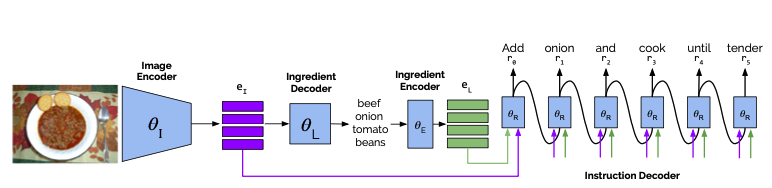

## **3. Generating recipes from images**
In this paper they emphasized about the recipe generation pipeline that starts with predicting the ingredient list at first. After this a sequence of instructions (how to cook the food) will be generated **conditioned on both the image and its corresponding list of ingredients**. 


---


##### **The Model overview**
- Input:  Takes a food image as an input 
- Output: Sequence of cooking instructions 

The outputs are generated by the means of an instruction decoder that takes two embeddings as input, 
- The first one is the features extracted from an image
- The second one encodes ingredients extracted from the image. 

They have used transformer based models especially putting altogether at the end for Instruction Decoder. 


---

First will look into the Instruction transformer, to be more precise the Instruction Decoder that will help us to get sequence of instructions. 

### **3.1 Instruction Transformer**
This takes in a input image with associated ingredients, to produce a sequence of instruction R = (r1 , r2......rT) 
- where rt denotes a word in sequence, 
- rT -> upto the T numbers

The transformer model of this instruction decoder is conditioned jointly on two inputs, 
- image representation `[eI]`  
- ingredient embedding `[eL]`

**How do we get the `eI` and `eL`?**
- The image representation is extracted with a `ResNet50` encoder
- To get the ingredient embedding `[eL]`, they use a decoder architecture to predict the ingredients, followed by a single **embedding layer mapping each ingredient into a fixed vector** `[tf.keras.layers.Embedding()]`. 

#### **Construction of the instruction transformer**

- The instruction decoder is composed of transformer blocks. 
- where each of the transformer blocs contains two attention layers followed by a linear layer. (read the attention is all you need paper). 
- 




